# Project: Superstore Data Analysis 


## Table of Contents 

<ul>
<li><a href="#intro">Introduction</a></li> 
<li><a href="#wrangling">Data Wrangling</a>
    <ul> 
        <li><a href="#assess">Assessment</a></li>
        <li><a href="#cleaning">Cleaning</a></li>
        </ul>
    </li> 
<li><a href="#eda">Exploratory Data Analysis</a>
    <ul> 
        <li><a href="#uni">Univariate Exploration</a></li>
        <li><a href="#bi">Bivariate Exploration</a></li> 
        <li><a href="#multi">Multivariate Exploration</a></li>
        </ul>
    </li> 
<li><a href="#conclusions">Conclusions</a></li>
</ul> 

<a id='intro'></a>
## Introduction 

The superstore dataset contains 9,994 entries on 12 features. The features include shipping mode, segment, country, city, state, and region where the customer resides, postal code, category, subcategory, unit price and quantity of the product purchased by the customer, the profit gained, and the discount given on the product.

The analysis of the dataset aims to discover relationships between the features and gain meaningful insights from the relationships. Exploratory Data Analysis (EDA) will be carried out, and univariate, bivariate, and multivariate visualizations will be created to better understand the individual features in the dataset, and discover significant relationships. 

In [1]:
#import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
sb.set_style("darkgrid") 

%matplotlib inline 

In [2]:
#load dataset 
samp_superstore = pd.read_csv("sample_superstore.csv") 


<a id='wrangling'></a>
## Data Wrangling 

Before beginning Exploratory Data Analysis (EDA), the dataset will be assessed for quality and tidiness issues, and issues found will be dealt with to optimize the data and ensure accurate and reliable results are obtained from the analysis.

<a id='assess'></a>
### Assessment 

In [3]:
#view random rows of the dataset 
samp_superstore.sample(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
4400,Same Day,Consumer,United States,Columbia,Maryland,21044,East,Office Supplies,Appliances,901.950,3,0.0,297.6435
8026,Second Class,Corporate,United States,New York City,New York,10035,East,Office Supplies,Storage,78.800,1,0.0,1.5760
5143,Standard Class,Consumer,United States,New York City,New York,10009,East,Office Supplies,Binders,3.592,1,0.2,1.1225
2704,Second Class,Consumer,United States,New York City,New York,10009,East,Technology,Accessories,132.600,6,0.0,17.2380
5155,First Class,Consumer,United States,Kirkwood,Missouri,63122,Central,Furniture,Furnishings,212.940,3,0.0,34.0704
545,Standard Class,Consumer,United States,Fort Worth,Texas,76106,Central,Furniture,Furnishings,66.112,4,0.6,-84.2928
4142,Standard Class,Consumer,United States,Midland,Michigan,48640,Central,Office Supplies,Binders,57.420,9,0.0,26.4132
2291,Standard Class,Corporate,United States,Columbus,Georgia,31907,South,Furniture,Furnishings,595.380,6,0.0,297.6900
2629,First Class,Corporate,United States,Springfield,Ohio,45503,East,Office Supplies,Binders,11.220,10,0.7,-7.4800
7896,Standard Class,Home Office,United States,Wheeling,West Virginia,26003,East,Office Supplies,Paper,447.840,8,0.0,219.4416


In [4]:
#obtain descriptive summary of the dataset 
samp_superstore.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
#check for number of duplicate rows 
samp_superstore.duplicated().sum()

17

In [6]:
#check for number of null rows in each column
samp_superstore.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
#obtain unique values of ship mode 
samp_superstore["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [8]:
#obtain unique Segment values 
samp_superstore["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [9]:
#obtain the unique values in Country
samp_superstore.Country.unique()


array(['United States'], dtype=object)

In [10]:
# obtain the unique Regions
samp_superstore.Region.unique()


array(['South', 'West', 'Central', 'East'], dtype=object)

In [11]:
#obtain the number of unique values in Category
samp_superstore.Category.value_counts()


Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [12]:
#obtain the number of unique values in  Sub-Category column 
samp_superstore["Sub-Category"].nunique()


17

In [13]:
#obtain the count of the unique values in Sub-Category
samp_superstore["Sub-Category"].value_counts()


Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [14]:
#check for number of unique States 
samp_superstore.State.nunique()


49

In [15]:
#check number of Cities 
samp_superstore.City.nunique()


531

In [16]:
#obtain the unique Quantity values 
samp_superstore.Quantity.unique()

array([ 2,  3,  5,  7,  4,  6,  9,  1,  8, 14, 11, 13, 10, 12])

### Issues 

- Spaces in column names 
- Repititive value in `Country` column
- Dtype of Postal Code as int
- Zip codes with less than 5 numeric digits 
- "-" in `Sub-Category` column
- Duplicated rows 
- No unit price column
- Dtype of `Quantity` column
- Unordered `Quantity` values
- Unordered `Ship_Mode` values  
- Negative `Profit` values 
- Null rows 

<a id='cleaning'></a>
### Cleaning

One of the issues noted in the assessment phase is the presence of a space between the words of some column names.

Below, the space in those column names will be replaced with an underscore ("\_") as this allows more flexibility in the use of the column names.

In [17]:
#create a list containing column names 
col_names = list(samp_superstore.columns) 


In [18]:
def replace_space(df, list_col_names): 
    """
    This function replaces the space in the column names 
    with spaces between their words with '_'
    """
    for col_name in list_col_names: 
        if " " in col_name: 
            new_name = col_name.replace(" ", "_") 
            df.rename(columns = {col_name : new_name}, 
                      inplace = True) 
    return df 


In [19]:
#apply the function 
samp_superstore = replace_space(samp_superstore, col_names) 

#confirm change 
samp_superstore.head(1)

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136


Since all the transactions made were to customers living in the United States, the `Country` column will be dropped as it is unnecessary, and only contains repetitive values.

In [20]:
#drop Country column 
samp_superstore.drop("Country", axis = 1, inplace = True) 

#confirm 
samp_superstore.columns

Index(['Ship_Mode', 'Segment', 'City', 'State', 'Postal_Code', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

The postal code for customers in the dataset has datatype as integer. This will be converted to string datatype as calculations will not be performed on the postal codes.

In [21]:
#change datatype of Postal_Code from int to string 
samp_superstore.Postal_Code = samp_superstore.Postal_Code.astype(str)

#confirm 
samp_superstore.dtypes


Ship_Mode        object
Segment          object
City             object
State            object
Postal_Code      object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

According to this [article](https://www.usatoday.com/story/news/2022/10/03/what-is-a-postal-code-zip/7836090001/), in the United States, postal codes are usually 5-digit characters. During the data assessment though, some postal codes were noticed to have only 4 digits. This may have been a typographical error. Below, 0 will be added to the front of each incomplete postal code.

In [22]:
def incomplete_code_checker(col_name):
    """This function returns the number 
    of codes in a code column with less 
    than 5 digits"""
    count = 0
    for x in col_name:
        if len(x) < 5: 
            count += 1 
        else: 
            count += 0 
    return count 


In [23]:
#apply to Postal_Code 
incomplete_code_checker(samp_superstore.Postal_Code)


449

In [24]:
#add zero to at the beginning of incomplete postal codes 
samp_superstore.Postal_Code = samp_superstore.Postal_Code.str.pad(5, fillchar = "0")

# confirm 
incomplete_code_checker(samp_superstore.Postal_Code) 


0

Below, the column `Sub-Category` will be renamed `Sub_Category`. This again is to increase the flexibility of use.

In [25]:
#rename Sub-Category column 
samp_superstore.rename(columns = {"Sub-Category" : "Sub_Category"}, inplace = True)

#confirm 
samp_superstore.head(1)


,Ship_Mode,Segment,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136


A total of 17 rows were found to be duplicated in the assessment phase and will be dropped next.

In [26]:
#drop duplicate rows 
samp_superstore.drop_duplicates(inplace = True)

#confirm 
samp_superstore.duplicated().sum()


0

The data contained in the sales column is the total price of the quantity of a product purchased. To obtain the price for which a single product is sold, a unit price column will be created using the quantity and sales column. 

In [27]:
#create new column for unit price 
samp_superstore["Unit_Price"] = samp_superstore["Sales"] / samp_superstore["Quantity"] 

#confirm addition of the unit price column to samp_superstore dataset 
samp_superstore.head(15)


,Ship_Mode,Segment,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit,Unit_Price
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,130.9800
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,243.9800
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.3100
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,191.5155
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.1840
5,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694,6.9800
6,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656,1.8200
7,Standard Class,Consumer,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152,151.1920
8,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825,6.1680
9,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700,22.9800


The `Quantity` and `Ship_Mode` variables should be ordinal, hence, next the values in the columns will be ordered. First though, the datatype of the `Quantity` column will be changed to string. 

In [28]:
#change Quantity datatype to string 
samp_superstore.Quantity = samp_superstore.Quantity.astype(str) 

#confirm 
samp_superstore.dtypes


Ship_Mode        object
Segment          object
City             object
State            object
Postal_Code      object
Region           object
Category         object
Sub_Category     object
Sales           float64
Quantity         object
Discount        float64
Profit          float64
Unit_Price      float64
dtype: object

Next, the `Quantity` and `Ship_Mode` columns will be converted from plain string to an ordered categorical datatype.

In [29]:
#create Quantity order 
quantity_order = ["1", "2", "3", "4", "5", "6", 
                  "7", "8", "9", "10", "11", "12"]


In [30]:
#create the Quantity categorical datatype 
quantity_cat_dtype = pd.api.types.CategoricalDtype(ordered = True, categories = quantity_order) 

#apply created datatype on Quantity column
samp_superstore.Quantity = samp_superstore.Quantity.astype(quantity_cat_dtype)



**Note:**<br>
Below are the various shipping modes and their meanings.
- Standard Class - Shipping within 6 days.
- Second Class - Shipping within 3 days.
- First Class - Shipping within 1 day.
- Same Day - Shipping on the same day. 

In [31]:
#create Ship Mode order
ship_mode_order = ["Standard Class", "Second Class", "First Class", 
                   "Same Day"] 


In [32]:
#create the Ship Mode categorical datatype 
ship_mode_dtype = pd.api.types.CategoricalDtype(ordered = True, categories = ship_mode_order) 

#apply created datatype on Ship Mode column
samp_superstore.Ship_Mode = samp_superstore.Ship_Mode.astype(ship_mode_dtype)

#confirm Quantity and Ship Mode datatypes
samp_superstore.dtypes


Ship_Mode       category
Segment           object
City              object
State             object
Postal_Code       object
Region            object
Category          object
Sub_Category      object
Sales            float64
Quantity        category
Discount         float64
Profit           float64
Unit_Price       float64
dtype: object

During visual assessment of the dataset, some negative values were noticed in the `Profit` column. This may have been an error, and would be corrected below.<br>

First, the datatype of the column will be changed to string, and the negative sign ("-") will be sliced off the negative values. Afterwards, the values will be changed back to float.

In [33]:
#change data type of Profit column to string
samp_superstore.Profit = samp_superstore.Profit.astype(str)

#confirm change
samp_superstore.dtypes


Ship_Mode       category
Segment           object
City              object
State             object
Postal_Code       object
Region            object
Category          object
Sub_Category      object
Sales            float64
Quantity        category
Discount         float64
Profit            object
Unit_Price       float64
dtype: object

In [34]:
def neg_checker(colname): 
    """ This function returns the 
    number of negative string values 
    present in a column 
    """
    count = 0
    for x in colname:
        if "-" in x:
            count += 1
    return count
                      

In [35]:
#apply function on Profit column 
neg_checker(samp_superstore["Profit"])


1869

Convert negative values in `Profit` column to positive values.

In [36]:
def convert_to_positive(x): 
    """ This function converts negative 
    string values to positive string
    values """
    if "-" in x:
        return x[1:]
    else: 
        return x 
    

In [37]:
#apply to Profit column 
samp_superstore.Profit = samp_superstore.Profit.apply(convert_to_positive)

#confirm 
neg_checker(samp_superstore["Profit"])


0

Convert `Profit` column back to float. 

In [38]:
samp_superstore.Profit = samp_superstore.Profit.astype(float) 

#confirm change 
samp_superstore.dtypes 


Ship_Mode       category
Segment           object
City              object
State             object
Postal_Code       object
Region            object
Category          object
Sub_Category      object
Sales            float64
Quantity        category
Discount         float64
Profit           float64
Unit_Price       float64
dtype: object

Below, null rows noticed during assessment will be dropped.

In [39]:
#remove null rows
samp_superstore.dropna(inplace = True) 

#confirm 
samp_superstore.isnull().sum()


Ship_Mode       0
Segment         0
City            0
State           0
Postal_Code     0
Region          0
Category        0
Sub_Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
Unit_Price      0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis (EDA) 

In this section, individual features will be explored and relationships created to discover insights. This will be achieved by visualizing answers to questions such as: 

**Univariate Exploration**<br>
- What is the percentage distribution of the various modes of shipping? 

- In what segment was the most sales made? 

- What state has the highest sales frequency?

- What is the regional distribution of the sales made? 

- What is the categorical distribution of the products sold? 

- What is the distribution of the `Office Supplies` products sold? 

- How are the selling prices of the products sold distributed? 

- What is the `Sales` values distribution?  

- What is the distribution of the quantity of products sold? 

- What is the highest discount given?  

- What is the distribution of the profit made from sales? 


**Bivariate Exploration**<br>
- What category of products yields the most profit? 

- What city in California produces the highest profit? 

- What is the percentage distribution of products bought in large quantities? 

- What product yields the least profit? 

- Does profit increase with an increase in the number of products bought? 

- Is discount dependent on quantity? 

- What segment of customers are highest in each region? 

- How is shipping mode distributed across the different segments?  

- At what price are products typically sold?


**Multivariate Exploration**<br>
- What is the effect of quantity and selling price on discount?

- What is the effect of selling price and quantity on profit?

- What states produced the highest profits in each region? 

- What is the effect of selling price and segment on profit? 

<a id='uni'></a>
### Univariate Exploration 

The individual features will be explored to gain a better understanding of the data.

In [40]:
samp_superstore.sample(10)

,Ship_Mode,Segment,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit,Unit_Price
657,Same Day,Home Office,Aurora,Illinois,60505,Central,Furniture,Chairs,701.372,2,0.3,50.0980,350.686
6940,Standard Class,Corporate,New York City,New York,10009,East,Office Supplies,Supplies,28.400,5,0.0,8.2360,5.680
2323,Second Class,Corporate,Henderson,Kentucky,42420,South,Office Supplies,Binders,76.300,5,0.0,38.1500,15.260
4720,Second Class,Home Office,Los Angeles,California,90004,West,Office Supplies,Paper,61.960,2,0.0,27.8820,30.980
1425,Standard Class,Corporate,Mesa,Arizona,85204,West,Office Supplies,Storage,363.648,4,0.2,86.3664,90.912
7436,Standard Class,Corporate,Oxnard,California,93030,West,Office Supplies,Art,99.200,5,0.0,25.7920,19.840
8148,Standard Class,Home Office,Santa Ana,California,92704,West,Office Supplies,Labels,20.160,7,0.0,9.8784,2.880
4799,Standard Class,Corporate,Jacksonville,Florida,32216,South,Technology,Phones,43.600,5,0.2,4.3600,8.720
5330,Standard Class,Consumer,New York City,New York,10011,East,Furniture,Furnishings,63.940,1,0.0,24.9366,63.940
6806,Standard Class,Corporate,Everett,Washington,98208,West,Office Supplies,Binders,3.856,1,0.2,1.3978,3.856


#### What is the percentage distribution of the various modes of shipping? 

Note:<br>
Below are the various shipping modes and their meanings.

- Standard Class - Shipping within 6 days.
- Second Class - Shipping within 3 days.
- First Class - Shipping within 1 day.
- Same Day - Shipping on the same day. 

In [41]:
#choose color palette 
choice_color = sb.color_palette()[9]


In [42]:
#obtain count for each unique value in Ship _Mode
mode_count = samp_superstore.Ship_Mode.value_counts() 

#obtain total count of Ship_Mode in dataset 
mode_sum = mode_count.sum()


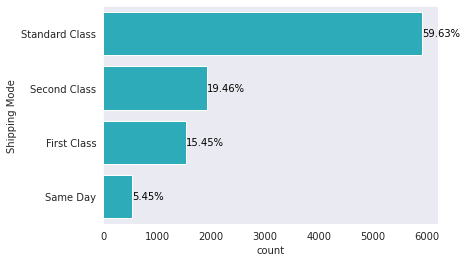

In [43]:
#visualize percentage distribution of Ship_Mode 
sb.countplot(data = samp_superstore, y = "Ship_Mode", color = choice_color);

#include percentage text on bars 
for i in range(mode_count.shape[0]): 
    count = mode_count[i]
    prop_str = '{:0.2f}%'.format(100 * count / mode_sum) 
    plt.text(count + 1, i, prop_str, va = "center", color = "black") 

plt.ylabel("Shipping Mode")
plt.grid(False)    


#### Observations 

- `Standard Class` has the highest percentage.
- There is a decrease in percentage of use from `Standard Class` -> `Second Class` -> `First Class` -> `Same Day`.
- By far more customers use the `Standard Class` mode of shipping, and only a very few use `Same Day`. 

#### In what segment was the most sales made?

In [44]:
#choose color 
color6 = sb.color_palette()[7]

In [45]:
#obtain count of each unique value in Segment
seg_count = samp_superstore.Segment.value_counts() 

#obtain total count of Ship_Mode in dataset 
seg_sum = seg_count.sum()

#create bar order
seg_order = seg_count.index


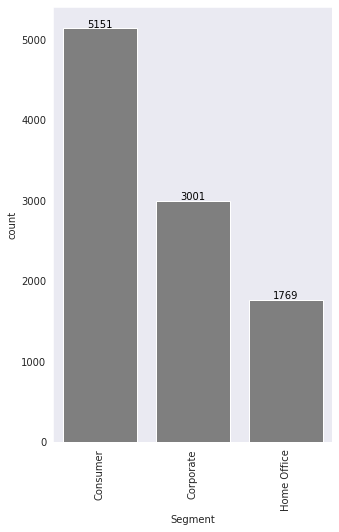

In [46]:
#set figure size
plt.figure(figsize = (5,8))

#visualize distribution of Ship_Mode 
sb.countplot(data = samp_superstore, x = "Segment", color = color6, 
            order = seg_order);

#include text on bars 
locs, labels = plt.xticks(rotation = 90)
for loc, label in zip(locs, labels): 
    count = seg_count[label.get_text()]
    count_str = '{}'.format(count)
    plt.text(loc, count + 5, count_str, ha = "center", color = "black");
             

plt.grid(False)  
            

#### Observations 

- More products are purchased for consumer use than for corporate and home office.
- Products are least purchased for home office.

#### What state has the highest sales frequency?

In [47]:
#choose color palette 
base_color = sb.color_palette()[0]


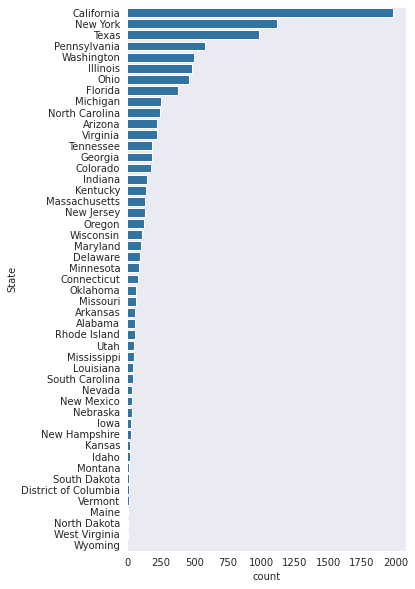

In [48]:
#set figure size
plt.figure(figsize = (5,10))

#set order
state_order = samp_superstore.State.value_counts().index

#visualize State distribution
sb.countplot(data = samp_superstore, y = "State", color = base_color,
            order = state_order); 

plt.grid(False)


#### Observations 

- Most customers reside in the state of California.
- A significant number of customers also reside in New York and Texas.
- Purchases are barely made by people residing in Maine, North Dakota, West Virginia, and Wyoming.

#### What is the regional distribution of the sales made?

In [49]:
#choose color 
color4 = sb.color_palette()[5]

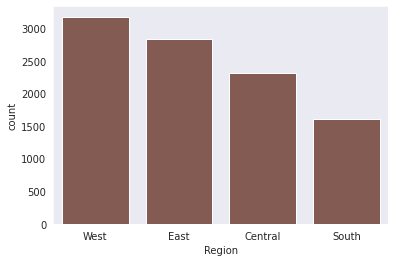

In [50]:
#obtain order 
reg_order = samp_superstore.Region.value_counts().index

#visualize
sb.countplot(data = samp_superstore, x = "Region", color = color4, 
             order = reg_order);

plt.grid(False)


#### Observations

- There is a significant number of customers in each region.
- There are more customers in the West than in other regions.
- There is a decrease in customers from the West -> East -> Central -> South.

#### What is the categorical distribution of the products sold?

In [51]:
#set order of bars 
cat_order = samp_superstore.Category.value_counts().index

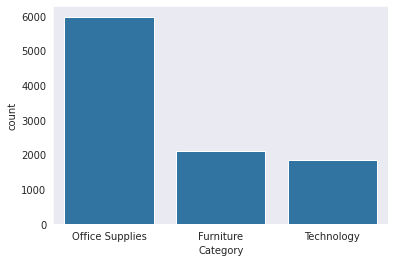

In [52]:
#visualize Category of products sold
sb.countplot(data = samp_superstore, x = "Category", color = base_color, 
            order = cat_order);

plt.grid(False)
             

#### Observations

- The majority of products purchased are office supplies. 
- Furniture pieces purchased are less than half of the number of office supplies purchased.
- Technology products are the least purchased.

#### What is the distribution of the `Office Supplies` products sold?

In [53]:
#filter out rows for which the products are in the office supplies category
office_supplies = samp_superstore[samp_superstore["Category"] == "Office Supplies"]

#set order for office supplies subcategories 
office_sup_order = office_supplies.Sub_Category.value_counts().index

#choose bar color 
color5 = sb.color_palette()[6]


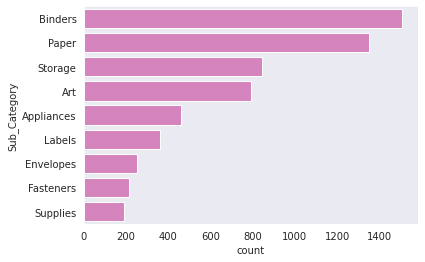

In [54]:
#visualize 
sb.countplot(data = office_supplies, y = "Sub_Category", color = color5,
             order = office_sup_order); 

plt.grid(False)


#### Observations 

- Binders are on the most demand, this is followed by paper.
- Art is also on significant demand, and is in more demand than appliances.
- Less fasteners are sold than envelopes.
- Supplies are the least on demand.

#### How are the selling prices of the products sold distributed? 

In [55]:
#obtain descriptive summary of the unit price column
samp_superstore.Unit_Price.describe() 


count    9921.000000
mean       60.984940
std       143.154186
min         0.336000
25%         5.492000
50%        16.270000
75%        63.940000
max      3773.080000
Name: Unit_Price, dtype: float64

In [56]:
#separate unit price into two groups
lower_unit_price = samp_superstore.query('Unit_Price <= 500')
higher_unit_price = samp_superstore.query('Unit_Price > 500')


In [57]:
#obtain descriptive statistics of the lower 
#unit price group
lower_unit_price.Unit_Price.describe() 


count    9813.000000
mean       50.672045
std        77.444015
min         0.336000
25%         5.360000
50%        15.984000
75%        60.890000
max       499.990000
Name: Unit_Price, dtype: float64

In [58]:
#create bin edges
bin_edges = np.arange(0, lower_unit_price.Unit_Price.max() + 20, 20)


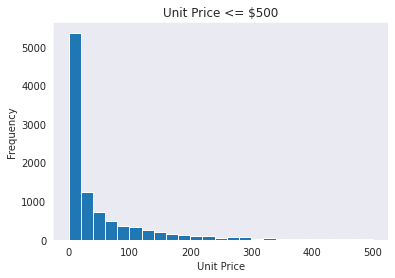

In [59]:
#create unit price histogram
plt.hist(data = lower_unit_price, x = "Unit_Price", bins = bin_edges);

#label axes 
plt.xlabel("Unit Price") 
plt.ylabel("Frequency")
plt.title("Unit Price <= $500")

plt.grid(False)


In [60]:
#obtain descriptive statistic for the higher unit price group
higher_unit_price.Unit_Price.describe()


count     108.000000
mean      998.026041
std       673.746041
min       500.792000
25%       599.759100
50%       702.882000
75%      1119.200000
max      3773.080000
Name: Unit_Price, dtype: float64

In [61]:
#create bins for the higher unit price histogram 
bin_s = np.arange(500, higher_unit_price.Unit_Price.max() + 100, 100)


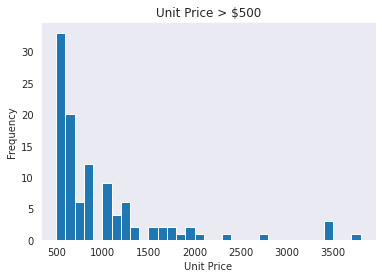

In [62]:
#plot histogram for higher unit price group 
plt.hist(data = higher_unit_price, x = "Unit_Price", bins = bin_s);

#label axes 
plt.xlabel("Unit Price") 
plt.ylabel("Frequency")
plt.title("Unit Price > $500")

plt.grid(False)


#### Observations 

- The price of most products fall in the range of \\$0 - 20. 

#### What is the `Sales` values distribution?

In [63]:
#obtain the summary statistics of the Sales features
samp_superstore.Sales.describe() 


count     9921.000000
mean       226.864776
std        613.003068
min          0.444000
25%         17.150000
50%         53.952000
75%        208.160000
max      22638.480000
Name: Sales, dtype: float64

In [64]:
#set bin edges 
bin_edges = np.arange(0, samp_superstore.Sales.max() + 500, 500)


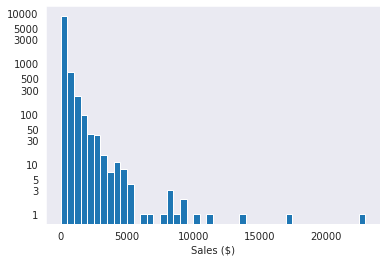

In [65]:
#visualize the Sales column
plt.hist(data = samp_superstore, x = "Sales", bins = bin_edges); 

#transform the y-axis to a log scale
plt.yscale("log")

#create ticks for y-axis
y_ticks = [1, 3, 5, 10, 30, 50, 100, 300, 500, 1000, 3000, 5000,
           10000] 
y_labels = ["{}".format(y_tick) for y_tick in y_ticks]
plt.yticks(y_ticks, y_labels);

#label the x-axis
plt.xlabel("Sales ($)") 

plt.grid(False)


The `Sales` values are skewed to the right, with some outliers after values in the range of \\$0-5000. Next, the `Sales` values will be visualized without the outliers. 

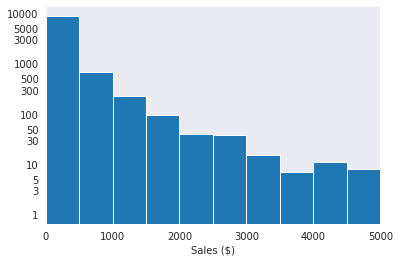

In [66]:
#visualize the Sales column
plt.hist(data = samp_superstore, x = "Sales", bins = bin_edges); 

#transform the y-axis to a log scale
plt.yscale("log")

#create ticks for the y-axis
y_ticks = [1, 3, 5, 10, 30, 50, 100, 300, 500, 1000, 3000, 5000,
           10000] 
y_labels = ["{}".format(y_tick) for y_tick in y_ticks] 
plt.yticks(y_ticks, y_labels)

#limit the x-axis 
plt.xlim(0, 5000);

#label the x-axis 
plt.xlabel("Sales ($)") 

plt.grid(False)


#### Observations 

- The `Sales` values are skewed to the right.
- More products are sold at lower prices than at higher prices. 

#### What is the distribution of the quantity of products sold? 

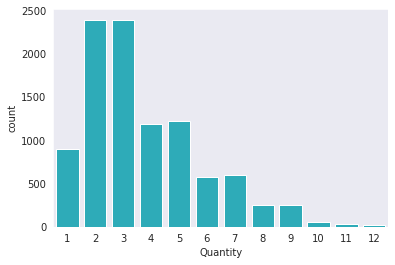

In [67]:
#visual Quantity of products sold
sb.countplot(data = samp_superstore, x = "Quantity", color = choice_color);

plt.grid(False)

#### Observations 

- Products are mostly purchased in 2 or 3 quantities.
- Only a very few products are purchased in quantities of 10 or more.
- A significant amount of products are also purchased in 4 or 5 quantities.


#### What is the highest discount given? 

In [68]:
#obtain descriptive statistics of Discount column 
samp_superstore.Discount.describe()


count    9921.000000
mean        0.156289
std         0.206497
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

In [69]:
#create bin edges 
bin_edges = np.arange(0, 0.8 + 0.2, 0.1)


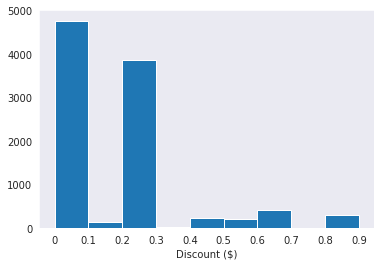

In [70]:
#visualize Discount 
plt.hist(data = samp_superstore, x = "Discount", bins = bin_edges); 

#create ticks 
ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
labels = ["{}".format(tick) for tick in ticks]

plt.xticks(ticks, labels)
plt.xlabel("Discount ($)");

plt.grid(False)


#### Observations 

- Most discounts given fall in the range of \\$0-0.1 and \\$0.2-0.3. 
- A very few discounts of \\$0.4-0.9 are given. 

#### What is the distribution of the profit made from sales? 

In [71]:
#obtain descriptive statistics for the Profit column
samp_superstore.Profit.describe()

count    9921.000000
mean       58.964413
std       222.765965
min         0.000000
25%         5.301000
50%        13.882800
75%        42.495000
max      8399.976000
Name: Profit, dtype: float64

In [72]:
#create bin edges
bin_edges = np.arange(0, samp_superstore.Profit.max() + 500, 500) 


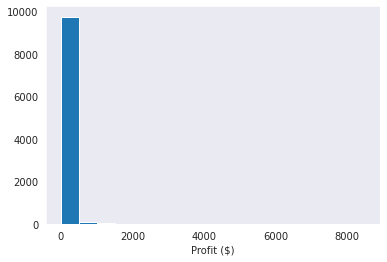

In [73]:
#visualize
plt.hist(data = samp_superstore, x = "Profit", bins = bin_edges); 

plt.xlabel("Profit ($)")
plt.grid(False);


From the plot above, the profit yielded from most products fall within the range of \\$0-2000. To get a better understanding of the profit distribution, visualizations will be created for profit yields above and below \\$1000. 

In [74]:
#filter out rows with Profit greater than $1000
greater_profit = samp_superstore.query('Profit > 1000')
greater_profit
                      

,Ship_Mode,Segment,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit,Unit_Price
27,Standard Class,Consumer,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.430,7,0.5,1665.0522,440.490
165,Standard Class,Consumer,San Antonio,Texas,78207,Central,Technology,Machines,8159.952,8,0.4,1359.9920,1019.994
318,Standard Class,Home Office,New York City,New York,10024,East,Technology,Machines,3991.980,2,0.0,1995.9900,1995.990
353,First Class,Home Office,New York City,New York,10009,East,Office Supplies,Binders,4355.168,4,0.2,1415.4296,1088.792
509,Standard Class,Consumer,Atlanta,Georgia,30318,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750,1270.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,Standard Class,Corporate,Sacramento,California,95823,West,Office Supplies,Binders,5083.960,5,0.2,1906.4850,1016.792
8990,Standard Class,Corporate,Springfield,Missouri,65807,Central,Technology,Copiers,4899.930,7,0.0,2302.9671,699.990
9270,Standard Class,Consumer,New York City,New York,10035,East,Office Supplies,Binders,4305.552,6,0.2,1453.1238,717.592
9741,Standard Class,Corporate,Burlington,Vermont,05408,East,Furniture,Bookcases,4404.900,5,0.0,1013.1270,880.980


In [75]:
#obtain descriptive statistics for the Profit column 
#in the filtered out subset 
greater_profit.Profit.describe()


count      62.000000
mean     2123.646611
std      1498.602046
min      1002.783600
25%      1193.006475
50%      1469.616750
75%      2392.219725
max      8399.976000
Name: Profit, dtype: float64

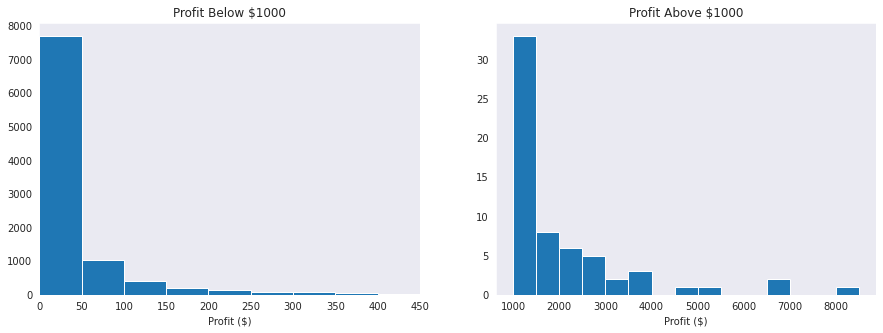

In [76]:
#set figure size for the plots
plt.figure(figsize = (15, 5))


#subplot for profit values below $1000
plt.subplot(1, 2, 1)

#create bin edges
bin_edges1 = np.arange(0, 1000 + 50, 50)

#visualize
plt.hist(data = samp_superstore, x = "Profit", bins = bin_edges1); 
plt.xlim(0, 450)
plt.xlabel("Profit ($)")
plt.title("Profit Below $1000")
plt.grid(False);


#subplot for Profit values above $1000 
plt.subplot(1, 2, 2) 

#create bin edges 
bin_edges2 = np.arange(1000, samp_superstore.Profit.max() + 500, 500)

#visualize 
plt.hist(data = greater_profit, x = "Profit", bins = bin_edges2); 
plt.xlabel("Profit ($)")
plt.title("Profit Above $1000")
plt.grid(False);


#### Observations 

- Most profits yielded are in the range of \\$0-50. 
- A good number of profit yields on products also lie in the range of \\$50-100.
- A few profit yields on products are in the range of \\$1000-8000. 

<a id='bi'></a>
### Bivariate Exploration 

In this section, the relationship between various pairs of variables in the dataset will be visualized.

In [77]:
#separate the numeric and categorical variables into groups
numeric_vars = ["Sales", "Discount", 
                "Profit", "Unit_Price"] 
categorical_vars = ["Ship_Mode", "Segment", "City", 
                    "State", "Region", "Category", 
                    "Sub_Category", "Quantity"]
                    
                    

To begin with, the correlation value and relationship between the various pairs of numeric variables will be visualized together and examined.

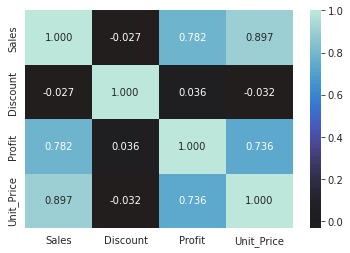

In [78]:
#check correlation between the various numeric variables
sb.heatmap(samp_superstore[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'icefire_r', center = 0);


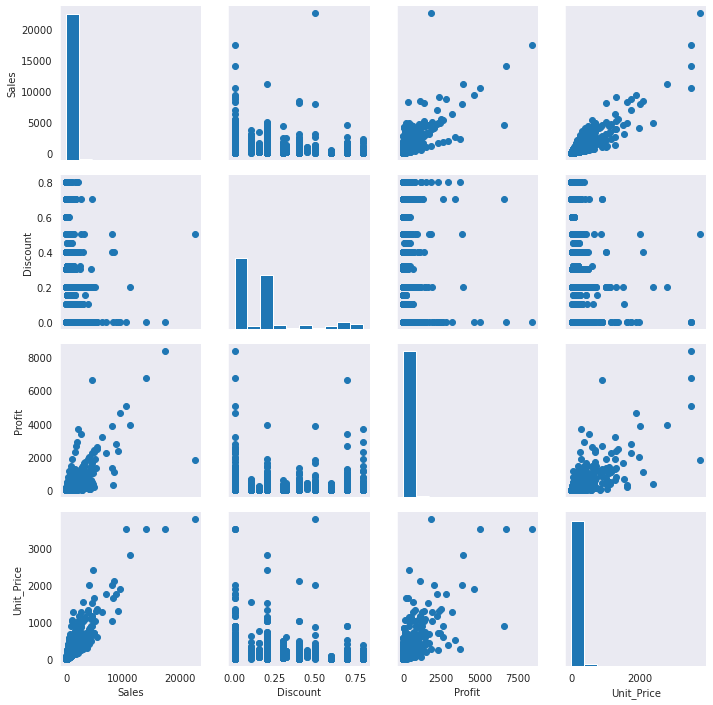

In [79]:
#plot the various numeric variables in pairs
g = sb.PairGrid(data = samp_superstore, vars = numeric_vars)
g = g.map_diag(plt.hist);
g.map_offdiag(plt.scatter); 

for ax in g.axes.flat: 
    ax.grid(False)


#### Observations 
Generally; 

- As the total sale price increases, there is a decrease in the discount given.
- Profit yield increases with an increase in the total sale price. 
- Products that yield high profit are sold at a low discount. 
- The relationship between unit price, total sale price, and profit is positive. Profit and total sale price increase with an increase in unit price.
- The discount given decreases with an increase in unit price. 

#### What category of products yields the most profit? 

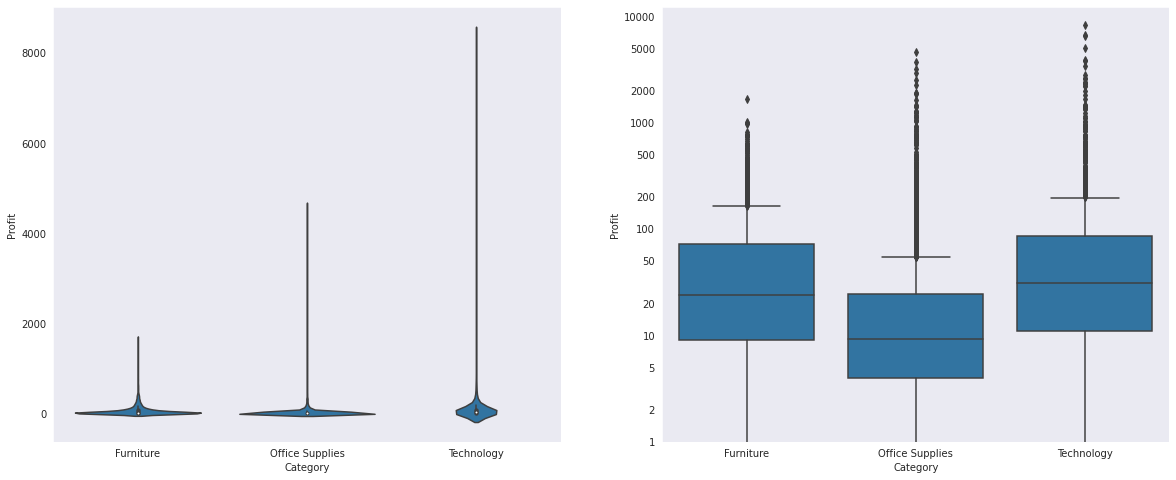

In [80]:
#create figure size 
plt.figure(figsize = (20, 8))


#create subplot for violin plot
plt.subplot(1, 2, 1)
sb.violinplot(data = samp_superstore, x = "Category", y = "Profit", 
             color = base_color); 

plt.grid(False)


#create subplot for box plot 
plt.subplot(1, 2, 2) 

sb.boxplot(data = samp_superstore, x = "Category", y = "Profit", 
             color = base_color); 
plt.yscale("log")

#create ticks for y-axis 
y_ticks = [1, 2, 5, 10, 20, 50, 100,200, 500, 1000, 2000, 5000, 10000]
tick_labels = ["{}".format(y_tick) for y_tick in y_ticks]
plt.yticks(y_ticks, tick_labels)

plt.grid(False)




#### Observations 

- The violin plot shows that the majority of the products in each category yielded profit less than \\$1000.
- The violin plot also shows an increase in profit yield from furniture to office supplies and technology products.
- The box plot gives a clearer view as to the range of profit each product category yields.
- According to the box plot: 
  - Most pieces of furniture yield profit in the range of \\$9-75. 
  - Most office supplies yield profit in the range of \\$4-30. 
  - Lastly, most technology products yield profit in the range of \\$10-90.
  

#### At what price are products typically sold?
A bar plot of the median selling price for each product will be shown below in order to better comprehend the plots above. 

In [81]:
#obtain products in the office supplies category
print(samp_superstore.query('Category == "Office Supplies"').Sub_Category.unique())

#obtain products in the furniture category
samp_superstore.query('Category == "Furniture"').Sub_Category.unique()


['Labels' 'Storage' 'Art' 'Binders' 'Appliances' 'Paper' 'Envelopes'
 'Fasteners' 'Supplies']


array(['Bookcases', 'Chairs', 'Tables', 'Furnishings'], dtype=object)

In [82]:
#obtain products in the technology category
samp_superstore.query('Category == "Technology"').Sub_Category.unique()


array(['Phones', 'Accessories', 'Machines', 'Copiers'], dtype=object)

In [83]:
#get the median unit price for the sub-category 
mid_binders = samp_superstore.query('Sub_Category == "Binders"').Unit_Price.median()
mid_copiers = samp_superstore.query('Sub_Category == "Copiers"').Unit_Price.median()
mid_machines = samp_superstore.query('Sub_Category == "Machines"').Unit_Price.median()
mid_supplies = samp_superstore.query('Sub_Category == "Supplies"').Unit_Price.median()
mid_envelopes = samp_superstore.query('Sub_Category == "Envelopes"').Unit_Price.median()
mid_accessories = samp_superstore.query('Sub_Category == "Accessories"').Unit_Price.median()
mid_paper = samp_superstore.query('Sub_Category == "Paper"').Unit_Price.median()
mid_appliances = samp_superstore.query('Sub_Category == "Appliances"').Unit_Price.median()
mid_phones = samp_superstore.query('Sub_Category == "Phones"').Unit_Price.median()


In [84]:
#cont'd
mid_art = samp_superstore.query('Sub_Category == "Art"').Unit_Price.median() 
mid_furnishings = samp_superstore.query('Sub_Category == "Furnishings"').Unit_Price.median()
mid_storage = samp_superstore.query('Sub_Category == "Storage"').Unit_Price.median()
mid_tables = samp_superstore.query('Sub_Category == "Tables"').Unit_Price.median()
mid_labels = samp_superstore.query('Sub_Category == "Labels"').Unit_Price.median() 
mid_chairs = samp_superstore.query('Sub_Category == "Chairs"').Unit_Price.median()
mid_fasteners = samp_superstore.query('Sub_Category == "Fasteners"').Unit_Price.median()
mid_bookcases = samp_superstore.query('Sub_Category == "Bookcases"').Unit_Price.median()


In [85]:
#obtain bar plot values
y_values = [mid_copiers, mid_machines, mid_tables, mid_chairs, mid_bookcases,
            mid_phones, mid_storage, mid_appliances, mid_accessories, mid_furnishings, 
            mid_envelopes, mid_supplies, mid_paper, mid_binders, mid_art, 
            mid_labels, mid_fasteners]
x_num = np.arange(len(y_values))
x_labels = ["Copiers", "Machines", "Tables", "Chairs", "Bookcases",
            "Phones", "Storage", "Appliances", "Accessories", "Furnishings",
            "Envelopes", "Supplies", "Paper", "Binders", "Art", 
            "Labels", "Fasteners"]
    
    

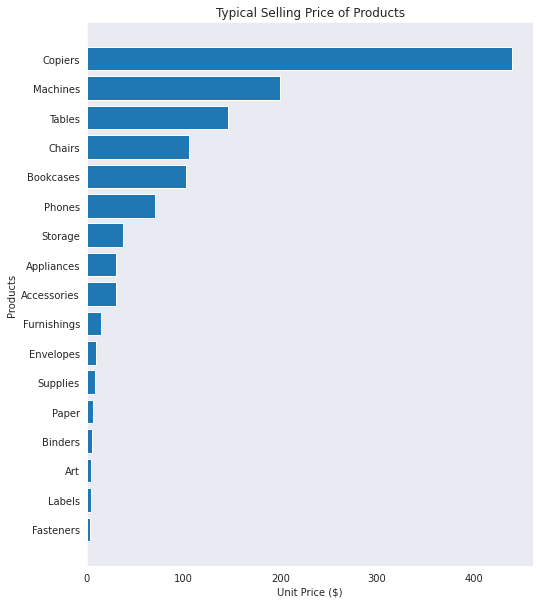

In [86]:
#set figure size 
plt.figure(figsize = (8,10))

#create barplot
plt.barh(x_num, y_values, tick_label = x_labels);
plt.gca().invert_yaxis()
plt.grid(False)

#label axes 
plt.xlabel("Unit Price ($)")
plt.ylabel("Products")

#title
plt.title("Typical Selling Price of Products");


#### Observations 

- Office supplies (labels, storage, art, binders, paper, fasteners, supplies, and envelope) are typically sold at the lowest prices.
- Technology products (copier and machines) are sold at the highest prices, with selling price of furnitures in between that of office supplies and technology products. 

#### What city in California produces the highest profit?

First, records for customers residing in California will be filtered out and then analyzed to determine what city in California produces the highest profit. Then a bar plot will be created to visualize the average profit yield in each city. 

In [87]:
#filter out rows with State value as California 
california = samp_superstore.query('State == "California"')
california


,Ship_Mode,Segment,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit,Unit_Price
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714,7.310
5,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694,6.980
6,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Art,7.280,4,0.0,1.9656,1.820
7,Standard Class,Consumer,Los Angeles,California,90032,West,Technology,Phones,907.152,6,0.2,90.7152,151.192
8,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Binders,18.504,3,0.2,5.7825,6.168
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,Standard Class,Consumer,Los Angeles,California,90008,West,Technology,Accessories,36.240,1,0.0,15.2208,36.240
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332,45.980
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932,129.288
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200,7.400


To order the bars in the bar plot that will be created, first, the average profit yield in each city in California will be obtained and the values will be sorted in descending order. Afterwards, the index of the cities arranged by their average profit in descending order will be obtained and used to order the bars.

In [88]:
#obtain the average profit generated in each city in California
city_profit_mean = california.groupby("City").Profit.mean()


#order the cities by their average profit in descending order
city_order = city_profit_mean.sort_values(ascending = False).index


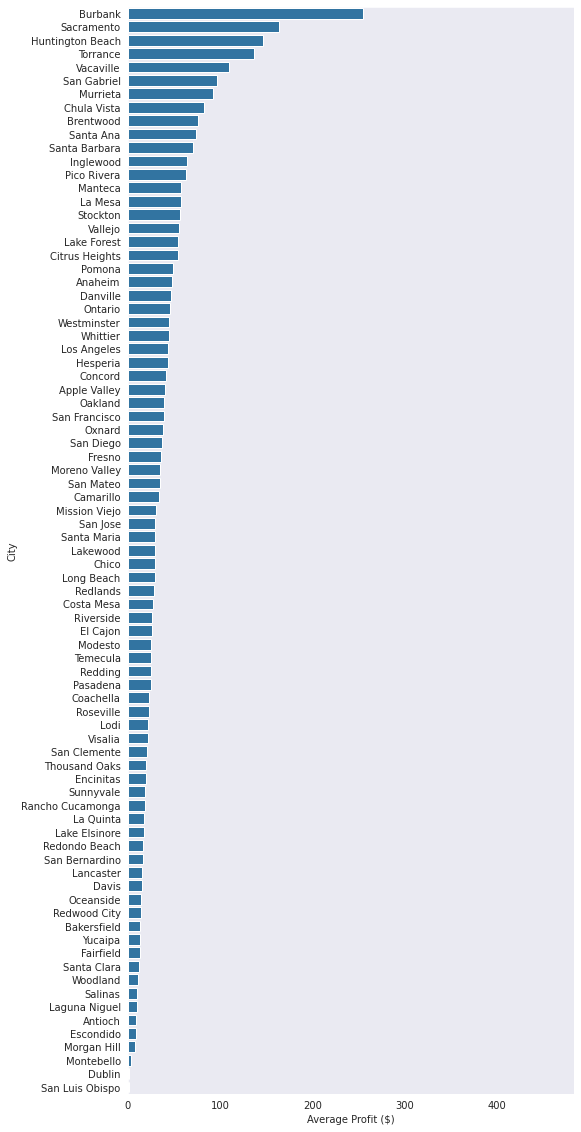

In [89]:
#set size of figure 
plt.figure(figsize = (8, 20)) 

#visualize 
sb.barplot(data = california, y = "City", x = "Profit", 
             color = base_color, errwidth = 0, 
          order = city_order); 
plt.xlabel("Average Profit ($)")
plt.grid(False)

#### Observations

- The average profit yield is highest at Burbank.

#### What is the percentage distribution of products bought in large quantities?

To determine what quantity can be considered large, the average quantity at which products were purchased will be obtained. 

In [90]:
#obtain average quantity at which products were purchased
samp_superstore.Quantity.astype(int).median()


3.0

On an average, products were purchased at a quantity of 3. Hence, large quantities will be considered as purchases in 4-12 quantities.<br>

**Note:**<br>
In the dataset, the maximum quantity at which a product was purchased is 12. 

In [91]:
#filter out products purchased in quantities >4 
large_quantities = samp_superstore[samp_superstore["Quantity"].astype(int) > 3]
large_quantities


,Ship_Mode,Segment,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit,Unit_Price
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,383.0310,191.5155
5,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694,6.9800
6,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656,1.8200
7,Standard Class,Consumer,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152,151.1920
9,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700,22.9800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,Standard Class,Consumer,Grand Rapids,Michigan,49505,Central,Office Supplies,Paper,35.5600,7,0.00,16.7132,5.0800
9984,Standard Class,Consumer,Long Beach,New York,11561,East,Office Supplies,Labels,31.5000,10,0.00,15.1200,3.1500
9985,Standard Class,Consumer,Long Beach,New York,11561,East,Office Supplies,Supplies,55.6000,4,0.00,16.1240,13.9000
9988,Standard Class,Corporate,Athens,Georgia,30605,South,Technology,Phones,206.1000,5,0.00,55.6470,41.2200


In [92]:
color_choice = sb.color_palette()[8]

#create order and, obtain count and total sum of products bought 
#in large quantities
product_count = large_quantities.Sub_Category.value_counts()  
product_sum = product_count.sum()
product_order = product_count.index


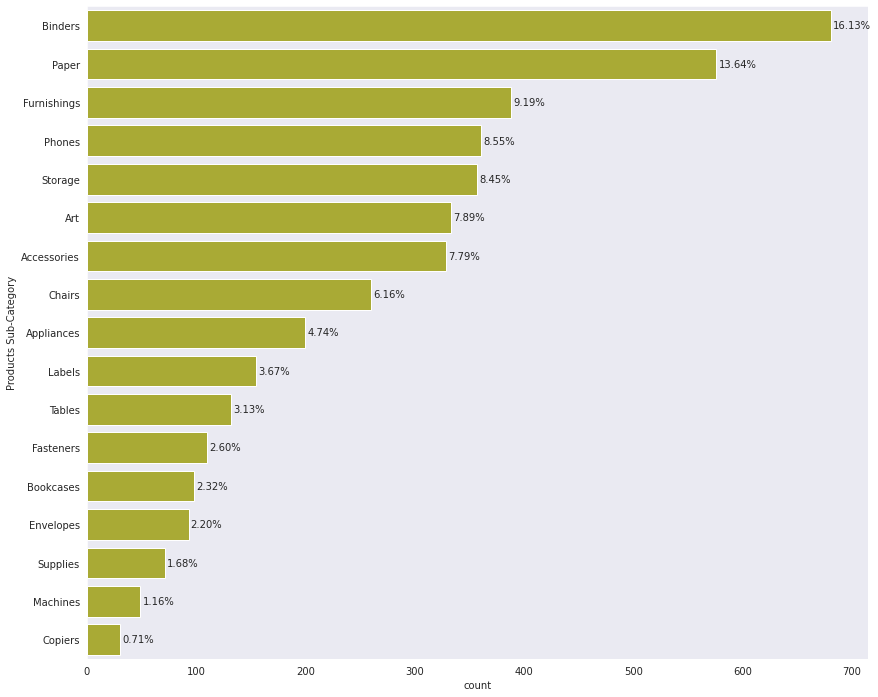

In [93]:
#set figure size
plt.figure(figsize = (14,12))

#visualize products 
sb.countplot(data = large_quantities, y = "Sub_Category", color = color_choice,
            order = product_order);


#include percentage text
for i in range(product_count.shape[0]): 
    count = product_count[i]
    percent = "{:0.2f}%".format(100 * (count/product_sum))
    plt.text(count + 2, i, percent, va = "center");
    

plt.ylabel("Products Sub-Category")
plt.grid(False) 


#### Observations 

- Binders are purchased in large quantities the most, followed by paper. 

#### What product yields the least profit?

In [94]:
#obtain average profit yield of each product
products_mean = samp_superstore.groupby("Sub_Category").Profit.mean() 

#create order of products by average profit value 
#in ascending order
products_order = products_mean.sort_values().index


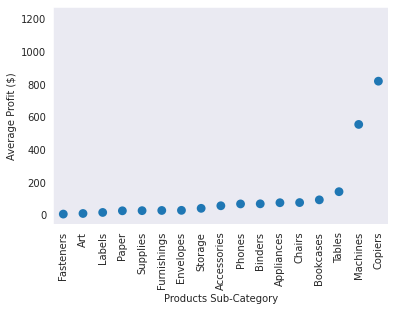

In [95]:
#visualize 
sb.pointplot(data = samp_superstore, x = "Sub_Category", y = "Profit", 
             order = products_order, errwidth = 0, linestyles = ""); 

plt.xticks(rotation = 90)
plt.xlabel("Products Sub-Category")
plt.ylabel("Average Profit ($)")
plt.grid(False)


#### Observations 

- The average profit yield of fasteners is the lowest.

#### Does profit increase with an increase in the number of products bought?

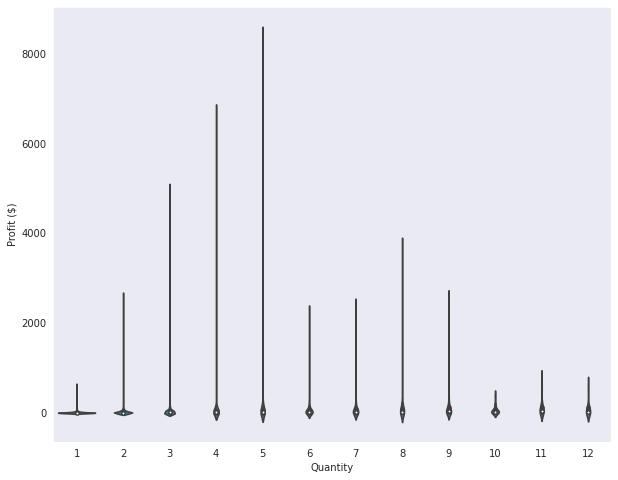

In [96]:
#set figure size 
plt.figure(figsize = (10, 8))

#visualize
sb.violinplot(data = samp_superstore, x = "Quantity", y = "Profit", 
             color = base_color);

plt.xlabel("Quantity") 
plt.ylabel("Profit ($)")

plt.grid(False)
              

#### Observations 

- There is an increase in profit as quantity increases from 1 to 5.
- As quantity increases from 5 to 6, there is a large decrease in profit, and a small increase as quantity goes from 6 to 8.
- Generally, there is a decrease in profit as the quantity goes from 8 to 12.


The trend observed above may be due to the type of product purchased.  

#### Is discount dependent on quantity?

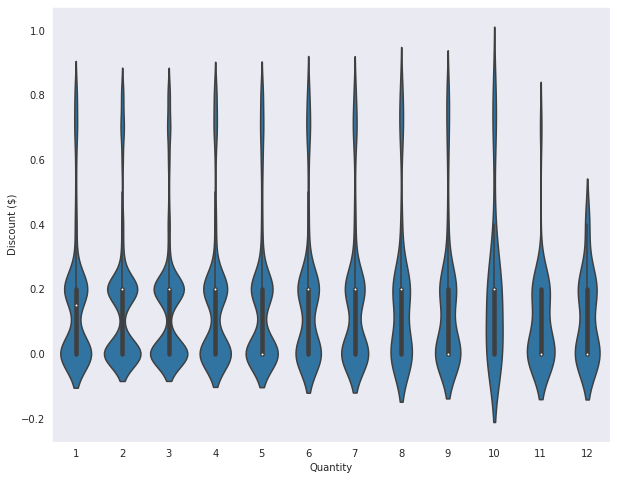

In [97]:
#set figure size 
plt.figure(figsize = (10, 8))

#visualize
sb.violinplot(data = samp_superstore, x = "Quantity", y = "Discount", 
             color = base_color);
plt.xlabel("Quantity") 
plt.ylabel("Discount ($)")

plt.grid(False)


#### Observations 

- There do not seem to be a distinct relationship between quantity and discount. Again, this may be due to the type of product and/or the various promos run by the store.

#### What segment of customers are highest in each region?

In [98]:
#create order for region in plot 
region_order = ["West", "East", "Central", "South"]


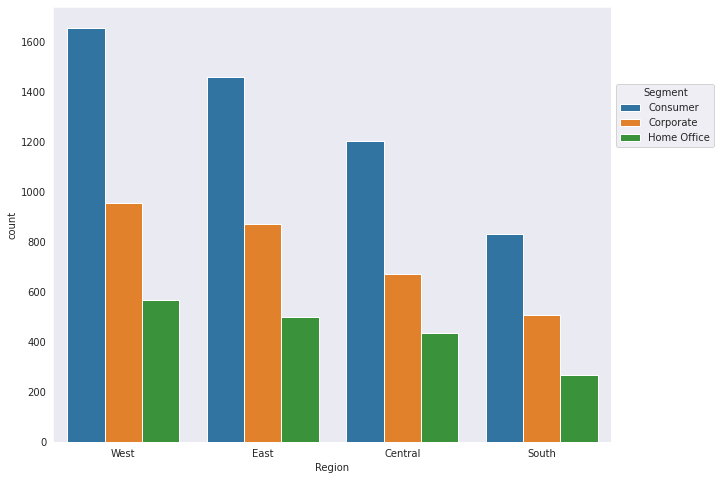

In [99]:
#set figure size 
plt.figure(figsize = (10,8))

#visualize
sb.countplot(data = samp_superstore, x = "Region", hue = "Segment", 
            order = region_order);

plt.legend(title = "Segment", loc = 6, bbox_to_anchor = (1, 0.75))
plt.grid(False)
                          

#### Observations 

- Consumers are highest in each region. 
- Purchases for home office are the least in each region. 

#### How is shipping mode distributed across the different segments? 

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


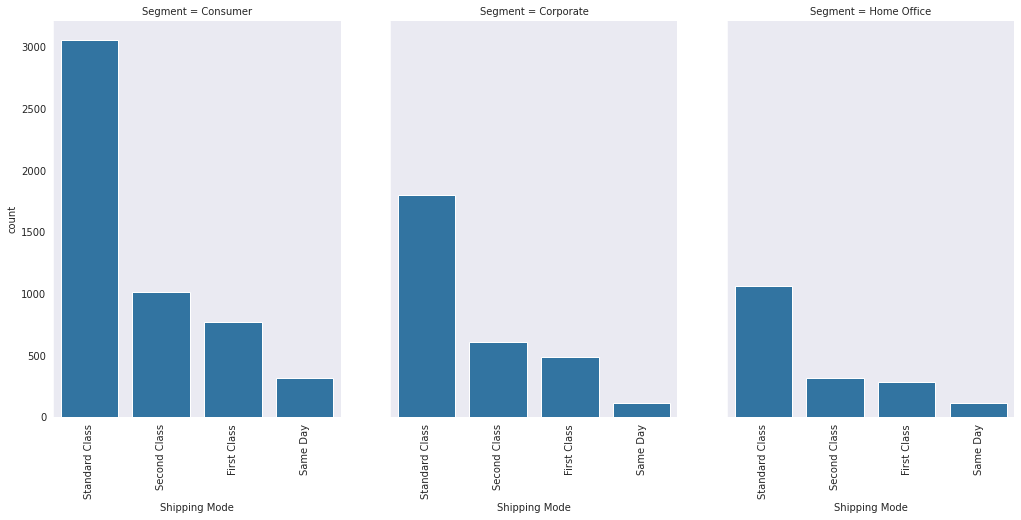

In [100]:
#plot
g = sb.FacetGrid(data = samp_superstore, col = "Segment"); 
g.map(sb.countplot, "Ship_Mode");
  
#label the x-axis and rotate labels     
for ax in g.axes.flat:
    label = ax.get_xticklabels() 
    ax.set_xticklabels(label, rotation = 90)
    ax.set_xlabel("Shipping Mode")
    ax.grid(False) 

#set figure size    
g.figure.set_size_inches(15, 8);  
    
             

#### Observations 

- Across each segment, the frequency of use decreases from standard class -> second class -> first class -> same day.

<a id='multi'></a>
### Multivariate Exploration 

In this section, the relationship between multiple pairs of variables will be combined and explored for a better understanding of the data. 

#### What is the effect of quantity and selling price on discount? 

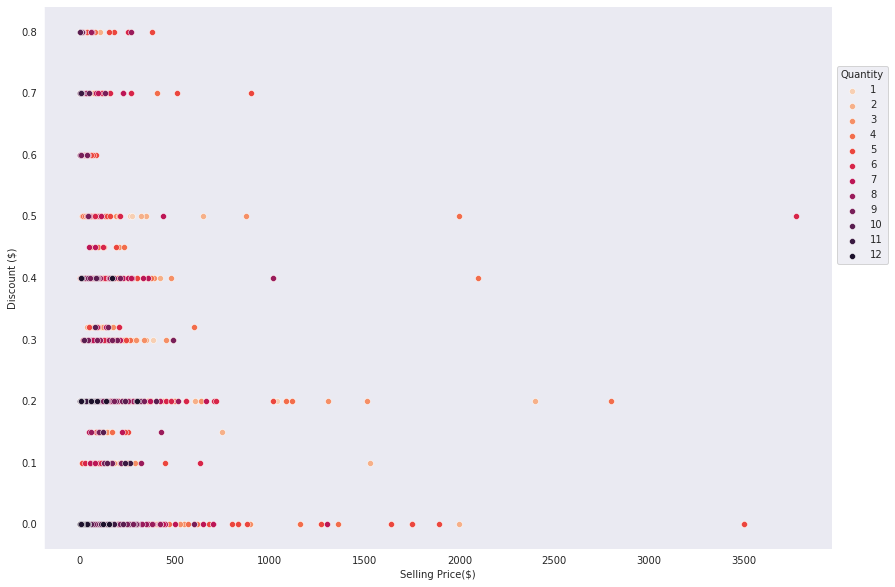

In [101]:
#visualize
g = sb.FacetGrid(data = samp_superstore, hue = "Quantity", 
                 palette = "rocket_r"); 
g.map(sb.scatterplot, "Unit_Price", "Discount") 

plt.xlabel("Selling Price($)") 
plt.ylabel("Discount ($)")
plt.legend(title = "Quantity", bbox_to_anchor = (1, 0.90)) 

g.figure.set_size_inches(15, 10); 

plt.grid(False)


#### Observations 
- The products bought in large quantities are those with low selling prices and get discounts ranging from \\$0 - 0.8.

- The products with higher selling prices are bought in a few quantities but also get discounts ranging from \\$0 - 0.8. 


#### What is the effect of selling price and quantity on profit? 

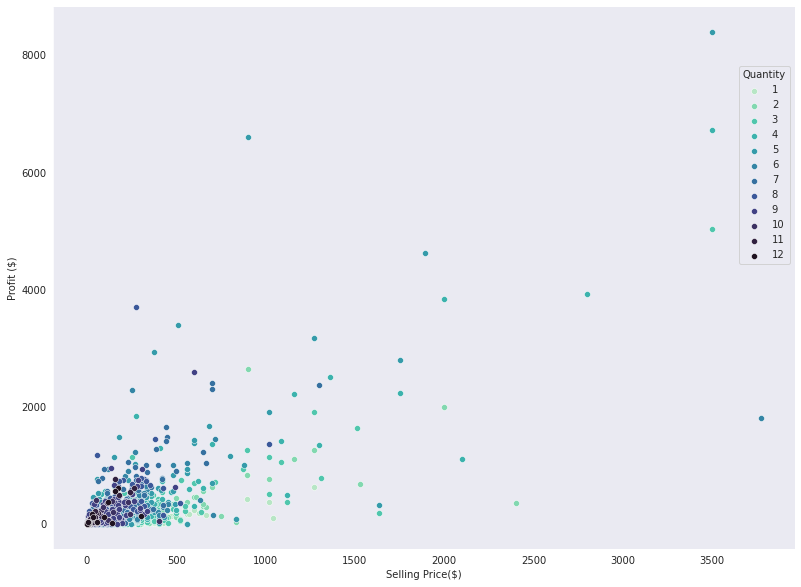

In [102]:
#visualize relationship between sale price, quantity and profit
g = sb.FacetGrid(data = samp_superstore, hue = "Quantity", 
                 palette = "mako_r"); 

g.map(sb.scatterplot, "Unit_Price", "Profit") 

plt.xlabel("Selling Price($)") 
plt.ylabel("Profit ($)")
plt.legend(title = "Quantity", bbox_to_anchor = (1, 0.90)) 

g.figure.set_size_inches(15, 10); 
plt.grid(False)


#### Observations

- Large quantity purchases mostly have a low selling price, and consequently, yield low profit. 

#### What states produced the highest profits in each region?  

To determine what states generated the highest profit yields in each region, the total profit yield in each state will first be visualized, then the states will be separated by region, and then visualized.

In [103]:
#obtain total profit yield of each state in each region
total_state_profit = samp_superstore.groupby(["Region", "State"]).Profit.sum()

#create a dataframe from the result obtained above
total_state_profit = total_state_profit.reset_index(name = "Total_Profit") 
total_state_profit
    

,Region,State,Total_Profit
0,Central,Illinois,26238.6956
1,Central,Indiana,18382.9363
2,Central,Iowa,1183.8119
3,Central,Kansas,836.4435
4,Central,Michigan,19481.7203
5,Central,Minnesota,10823.1874
6,Central,Missouri,6436.2105
7,Central,Nebraska,1649.5266
8,Central,North Dakota,230.1497
9,Central,Oklahoma,4853.9560


In [104]:
#filter out States by their regions
central_state_profit = total_state_profit.query('Region == "Central"')
east_state_profit = total_state_profit.query('Region == "East"')
south_state_profit = total_state_profit.query('Region == "South"')
west_state_profit = total_state_profit.query('Region == "West"')



In [105]:
#obtain the highest profit yield in each region
total_state_profit.groupby("Region").Total_Profit.max() 



Region
Central    47716.9425
East       82766.1540
South      18383.6816
West       81873.8496
Name: Total_Profit, dtype: float64

In [106]:
#obtain order of states in each region 
central_order = central_state_profit.groupby("State").Total_Profit.sum().sort_values(ascending = False).index
east_order = east_state_profit.groupby("State").Total_Profit.sum().sort_values(ascending = False).index 
south_order = south_state_profit.groupby("State").Total_Profit.sum().sort_values(ascending = False).index 
west_order = west_state_profit.groupby("State").Total_Profit.sum().sort_values(ascending = False).index


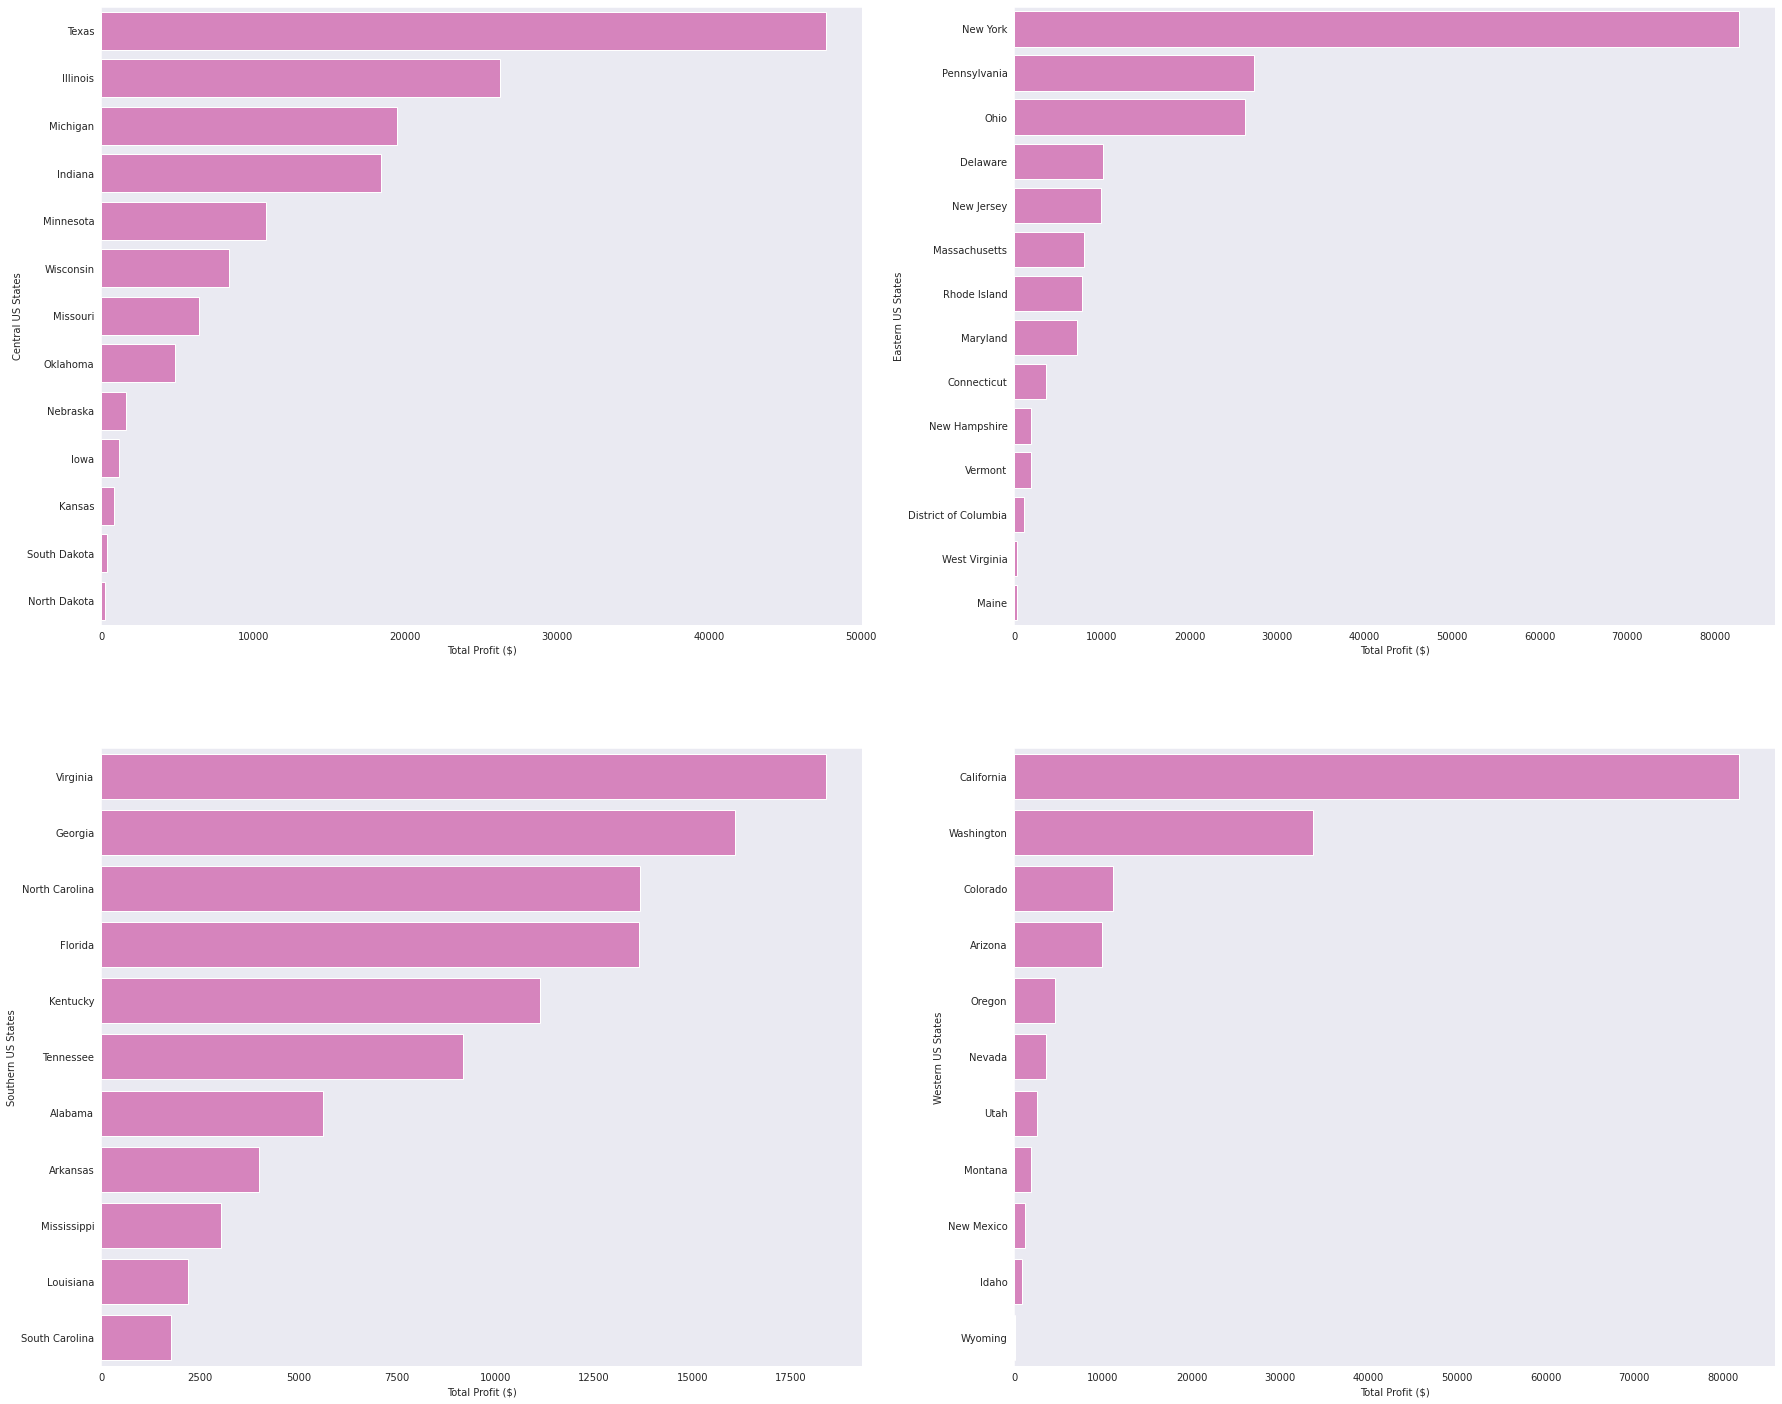

In [107]:
#set figure size
plt.figure(figsize = (30, 25))

#plot for states in the central region
plt.subplot(2, 2, 1) 
sb.barplot(data = central_state_profit, y = "State", x = "Total_Profit",
           order = central_order, color = color5)
plt.xlabel("Total Profit ($)")
plt.ylabel("Central US States")
plt.grid(False)


#plot for states in the east region 
plt.subplot(2, 2, 2) 
sb.barplot(data = east_state_profit, y = "State", x = "Total_Profit", 
           order = east_order, color = color5)
plt.xlabel("Total Profit ($)")
plt.ylabel("Eastern US States")
plt.grid(False) 


#plot for the states in the south region 
plt.subplot(2, 2, 3) 
sb.barplot(data = south_state_profit, y = "State", x = "Total_Profit", 
           order = south_order, color = color5)
plt.xlabel("Total Profit ($)")
plt.ylabel("Southern US States")
plt.grid(False) 


#plot for the states in the west region
plt.subplot(2, 2, 4) 
sb.barplot(data = west_state_profit, y = "State", x = "Total_Profit",
           order = west_order, color = color5)
plt.xlabel("Total Profit ($)")
plt.ylabel("Western US States")
plt.grid(False) 



#### Observations 

- The highest profits are produced by Texas, New York, Virginia, and California in the Central, East, South, and West regions of the United States respectively.

- With over \\$80,000 total profit, New York and California in the East and West regions respectively produce the most profits among high-profit producing states in other regions.

#### What is the effect of selling price and segment on profit? 

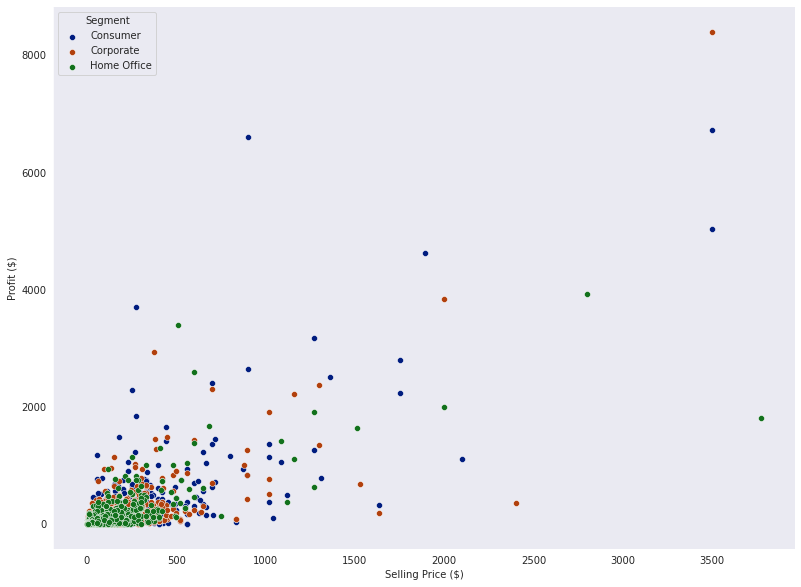

In [108]:
#visualize
g = sb.FacetGrid(data = samp_superstore, hue = "Segment", 
                 palette = "dark"); 

g.map(sb.scatterplot, "Unit_Price", "Profit") 

plt.xlabel("Selling Price ($)") 
plt.ylabel("Profit ($)")
plt.legend(title = "Segment") 

g.figure.set_size_inches(15, 10); 

plt.grid(False)
                 

#### Observations 

- Profit increases with an increase in selling price.
- Majority of the products have their selling price below \\$500 and consequently yield low profit.

Generally;  

- Selling price for products purchased by consumer > products purchased for corporate use > products purchased for home office. 

- Consequently, products purchased by consumers yield higher profit followed by those purchased for corporate use.<br> 
Products purchased for home office yield the lowest profit. 

<a id='conclusions'></a>
## Conclusions 

After careful observation of visualizations of various features in the data through Exploratory Data Analysis (EDA), the following insights were obtained:<br>

- Most customers opt for standard class for shipping their purchases.

- A few customers use second class and first class, but only approximately 5% of customers opt for same-day shipping. 

- The vast majority of products are purchased by consumers.  

- The majority of customers reside in the West, followed by the East, then Central and Southern US.

- Purchases are mostly made by customers residing in California, with the city of Burbank producing the most profit. 

- Office supplies are by far the most purchased category of products, with binders and paper being in the highest demand.

- Products sold at low prices are the most purchased, causing profit yield to be mostly within the range of \\$0-50. Also, products are mostly bought in quantities of 2 and 3, and product purchases in quantities of 10-12 are rare.

- Technological products generate the most profit.

- While profit increases with an increase in the number of products purchased, the type of product purchased also greatly influences the degree of increase in the profit.

- In the Central, East, South, and West regions of the United States, the highest profits are produced by Texas, New York, Virginia, and California respectively.

- California and New York generate the highest amongst these high-profit producing states in each region.

- Most products purchased for home offices have a low selling price, and consequently low profit. Products purchased by consumers are generally higher in selling price and yield higher profits. 
